In [7]:
!pip install convertdate LunarCalendar holidays



  Using cached holidays-0.10.5.2-cp37-none-any.whl
  Using cached hijri_converter-2.1.1-py3-none-any.whl (14 kB)
  Using cached korean_lunar_calendar-0.2.1-py3-none-any.whl (8.0 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
neuralprophet 0.2.7 requires pandas>=1.0.4, which is not installed.


In [8]:
import pandas as pd
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error

# plotting
import matplotlib.pyplot as plt

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [9]:
%config InlineBackend.figure_format = 'retina'


In [10]:
df = pd.read_csv('example_wp_log_peyton_manning.csv')
print(f'The dataset contains {len(df)} observations.')
df.head()

The dataset contains 2905 observations.


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


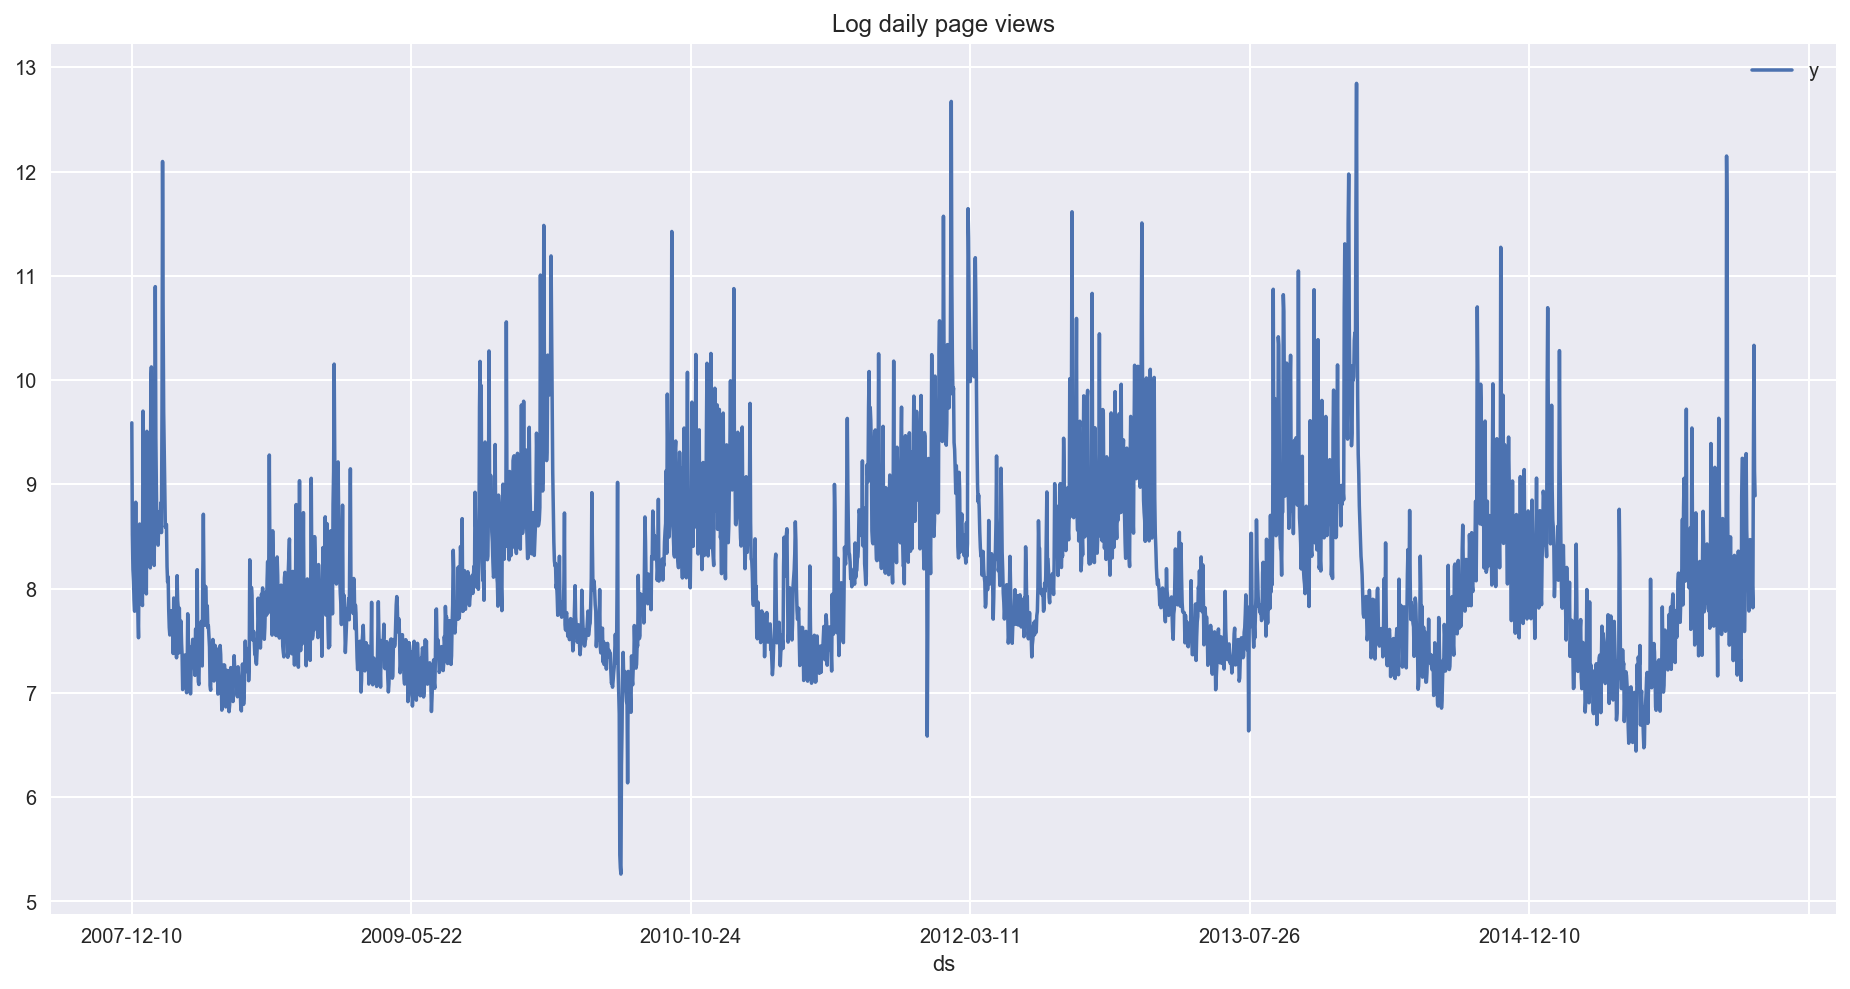

In [11]:
df.plot(x='ds', y='y', title='Log daily page views');


In [12]:
# getting the train/test split
test_length = 365
df_train = df.iloc[:-test_length]
df_test = df.iloc[-test_length:]

# Neural Prophet Model

In [13]:
nprophet_model = NeuralProphet()
metrics = nprophet_model.fit(df_train, freq="D")
future_df = nprophet_model.make_future_dataframe(df_train, 
                                                 periods = test_length, 
                                                 n_historic_predictions=len(df_train))
preds_df_2 = nprophet_model.predict(future_df)

C:\Users\farha\Anaconda3\envs\tensorflow_gpu\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: np

  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[25/25]: 100%|█████████████████████████| 25/25 [00:03<00:00,  7.53it/s, SmoothL1Loss=0.0054, MAE=0.361, RegLoss=0]


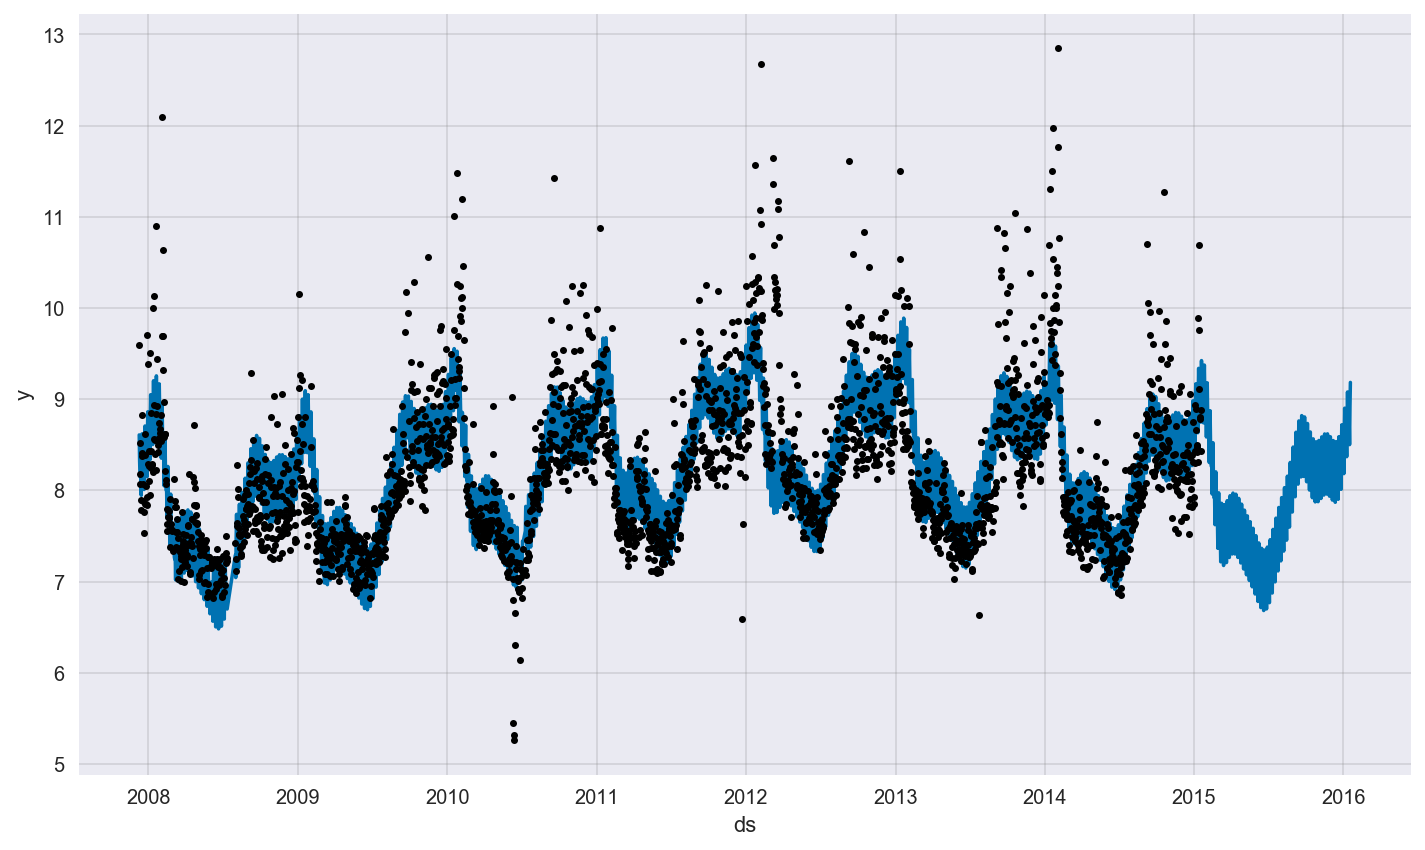

In [14]:
nprophet_model.plot(preds_df_2);

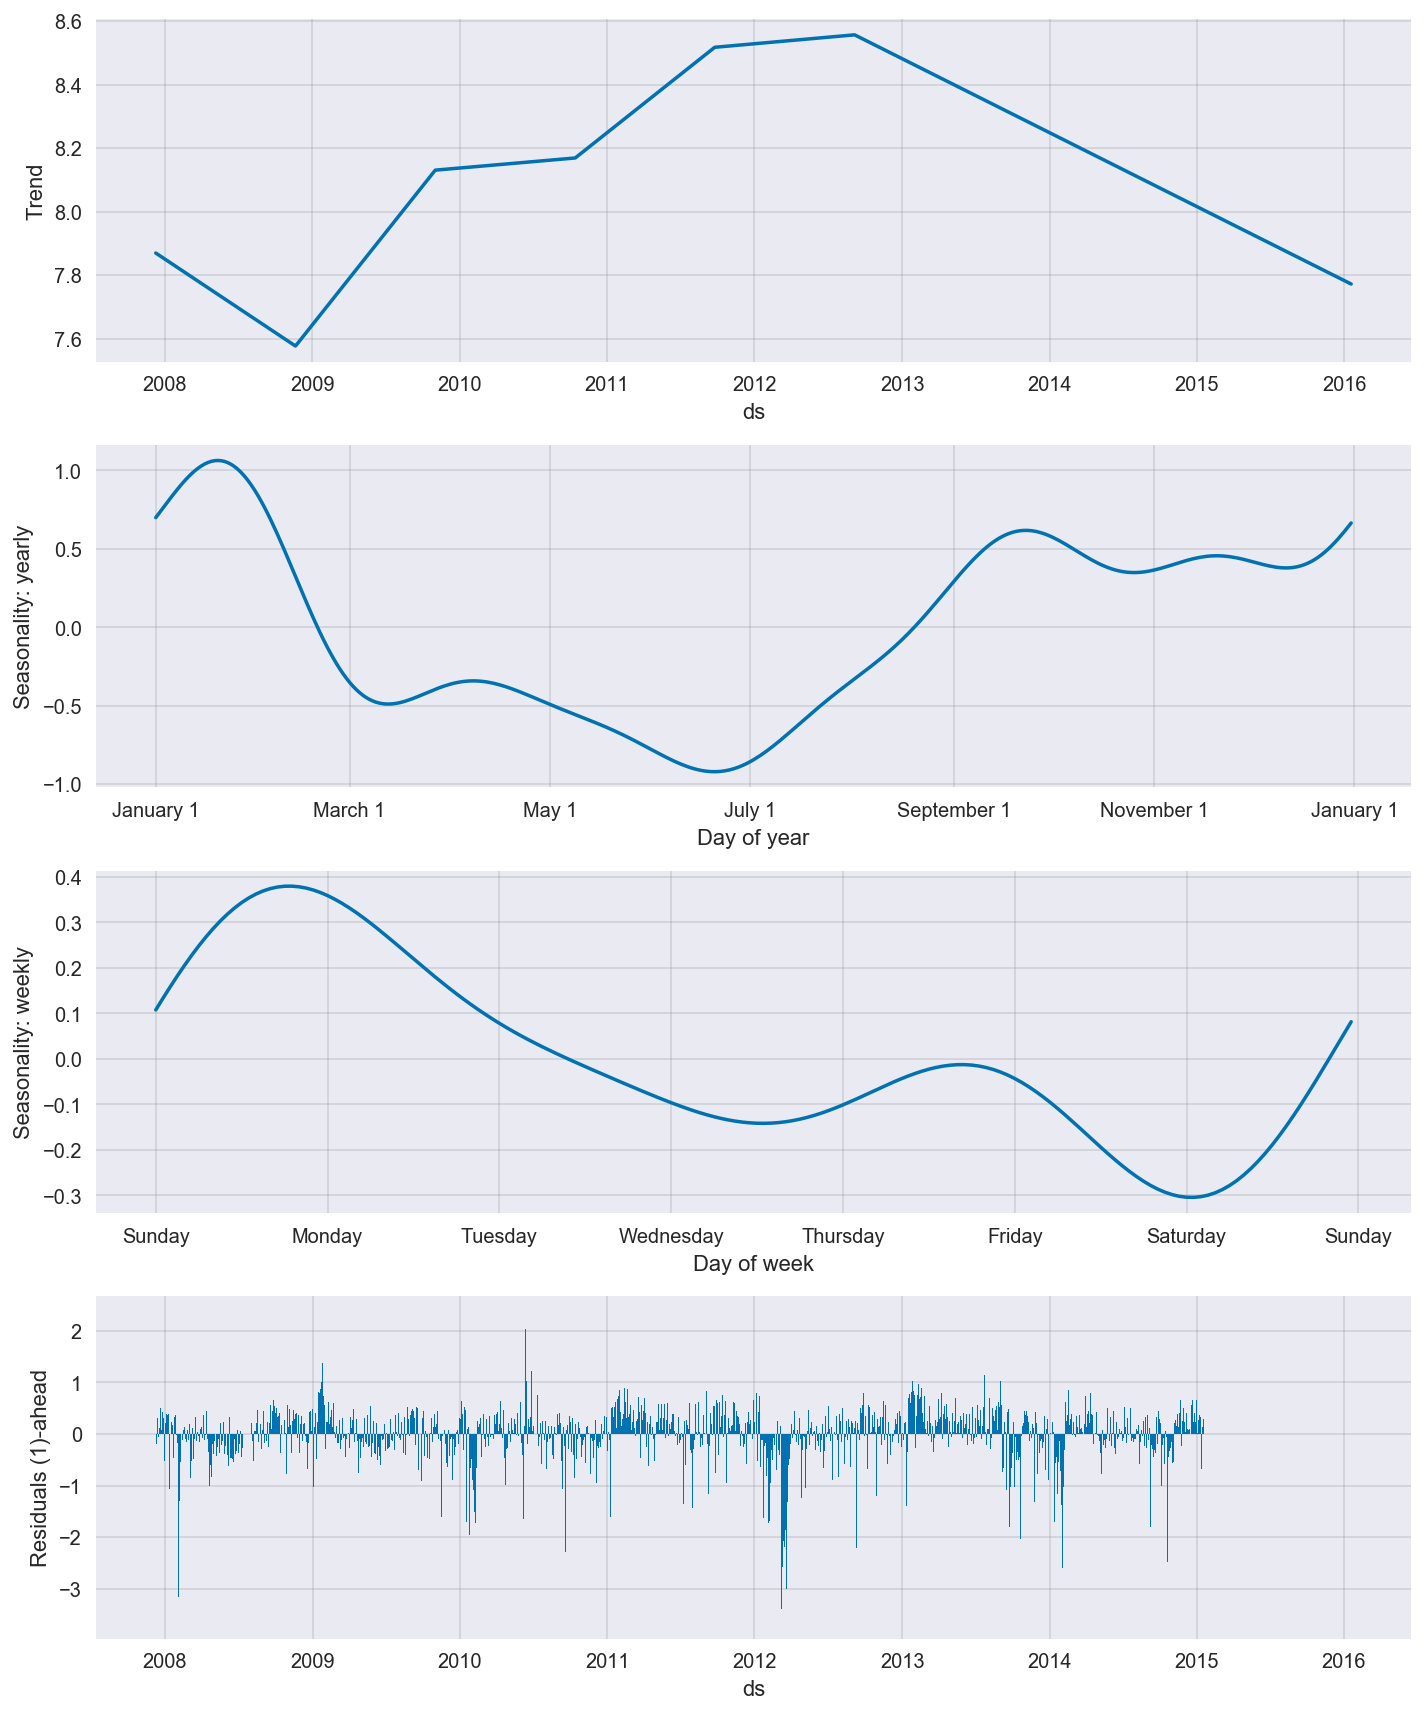

In [15]:
nprophet_model.plot_components(preds_df_2, residuals=True);


C:\Users\farha\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


MSE comparison ----
NeuralProphet:	0.3151


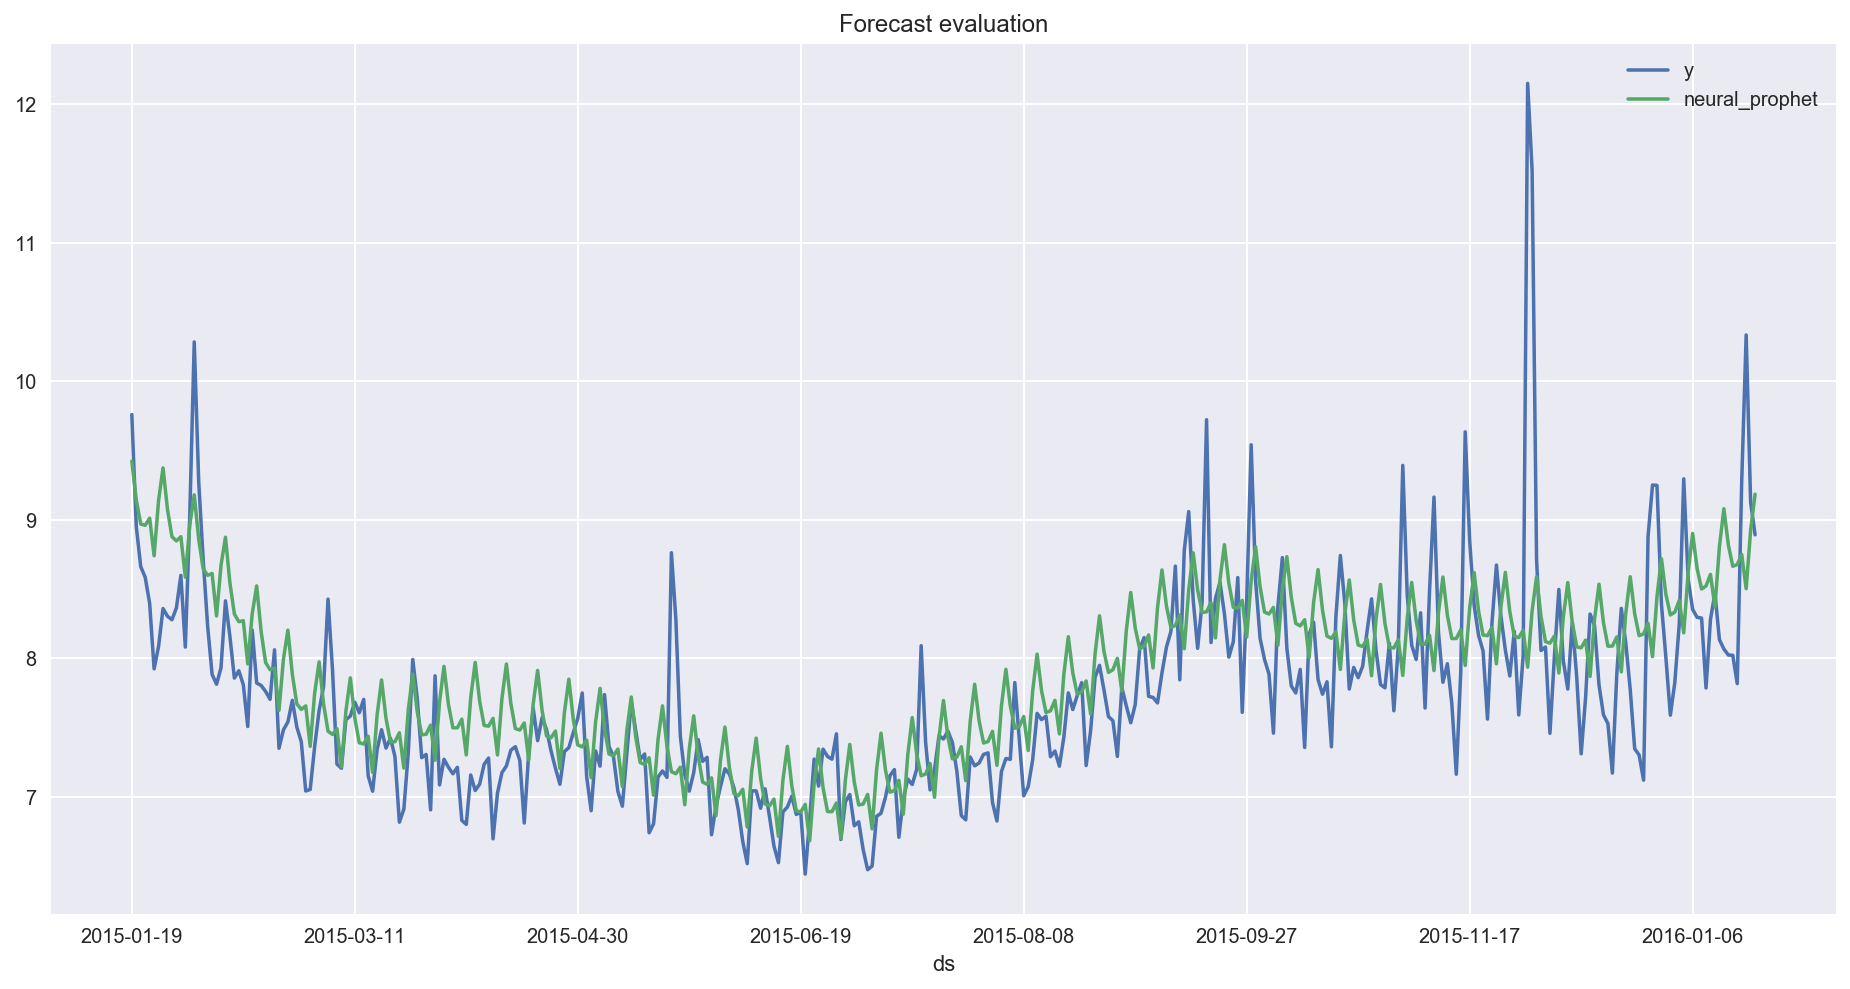

In [17]:
# I know about chained indexing here, but it was just faster and more elegant then using iloc and column index

# prepping the DataFrame
df_test['neural_prophet'] = preds_df_2.iloc[-test_length:].loc[:, 'yhat1']
df_test.set_index('ds', inplace=True)

print('MSE comparison ----')
print(f"NeuralProphet:\t{mean_squared_error(df_test['y'], preds_df_2.iloc[-test_length:]['yhat1']):.4f}")

df_test.plot(title='Forecast evaluation');